# Plotting test
*This notebook was made before digging further into the mlTests02 notebook, attemping to see if there is an issue with the data in my actual database, or with something else. This will likely be removed from future commits.*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3

In [2]:
# condensing several of the above cells into this one
# One

conn = sqlite3.connect('stockPrediction.db')

query = "SELECT r.stock_symbol, l.price_datetime, l.open_price, l.high_price, l.low_price, l.close_price, l.volume, l.dividends, l.stock_splits FROM price_history l INNER JOIN stock r ON r.stock_id = l.stock_id;"

symbols = conn.execute('SELECT stock_symbol FROM stock')
symbols = symbols.fetchall()
symbols = [i[0] for i in symbols]
symbols = [i for i in symbols if i not in symbols]

# columns = pd.MultiIndex.from_product([[i for i in symbols], ['open_price', 'high_price', 'low_price', 'close_price']], names=['symbol', 'type'])

df = pd.read_sql(query, conn, index_col=['stock_symbol', 'price_datetime'])

# Two

# remove stocks w/ less than 1000 data points
s = df.groupby(level=0).size()
# s = s.where(s > 1000).dropna()
s = s.where(s > 1550).dropna()  # playing around w/ different values here to get a model that can actually be trained
dfs = s.to_frame()
dfs = dfs.reset_index()
df = df.reset_index()
# dfs

# Three
df = pd.merge(df, dfs, how='inner', left_on='stock_symbol', right_on='stock_symbol', left_index=True)
df = df.drop_duplicates()
# this line below added in on 5/14 22:37:
df = df.drop(columns=[0])

# Four

# df = df.drop_duplicates(subset=['price_datetime'])
df = df.set_index(['price_datetime', 'stock_symbol']).unstack(['stock_symbol'])
df

open_price                                          \
stock_symbol              AACG   AAIC    AAME       AAU    ABEO   ABEV   
price_datetime                                                           
2021-02-11 09:30:00     6.0200  3.690  5.6100  0.963900  3.4550  2.820   
2021-02-11 09:45:00     6.2300  3.710  5.4500  0.918901  3.3796  2.855   
2021-02-11 10:00:00     6.0350  3.740  5.4999  0.936800  3.3070  2.830   
2021-02-11 10:15:00     5.9700  3.740  5.4100  0.939900  3.2886  2.835   
2021-02-11 10:30:00     5.9800  3.730  5.4466  0.947001  3.3300  2.830   
...                        ...    ...     ...       ...     ...    ...   
2021-05-12 15:15:00     2.7157  3.920  4.0100  0.522700  1.3950  3.235   
2021-05-12 15:30:00     2.7499  3.900  4.0100  0.515100  1.3950  3.225   
2021-05-12 15:45:00     2.7400  3.905  4.0200  0.519600  1.4000  3.225   
2021-05-12 15:59:18        NaN    NaN     NaN       NaN     NaN    NaN   
2021-05-12 15:59:59        NaN    NaN     NaN       NaN     NaN    NaN   

                                                    ... stock_splits       \
stock_symbol           ABIO   ABML    ABUS    ACER  ...          YPF YTRA   
price_datetime                                      ...                     
2021-02-11 09:30:00  5.2885  3.720  4.4100  4.1500  ...          NaN  NaN   
2021-02-11 09:45:00  5.4800  3.690  4.4213  4.1356  ...          NaN  NaN   
2021-02-11 10:00:00  5.4200  3.670  4.5393  4.3001  ...          NaN  NaN   
2021-02-11 10:15:00  5.3500  3.620  4.5900  4.4000  ...          NaN  NaN   
2021-02-11 10:30:00  5.3900  3.610  4.5200  4.5300  ...          NaN  NaN   
...                     ...    ...     ...     ...  ...          ...  ...   
2021-05-12 15:15:00  3.1900  1.520  2.7000     NaN  ...            0    0   
2021-05-12 15:30:00  3.1600  1.570  2.6950  2.6100  ...            0    0   
2021-05-12 15:45:00  3.1800  1.575  2.6991  2.6100  ...            0    0   
2021-05-12 15:59:18     NaN    NaN     NaN     NaN  ...          NaN  NaN   
2021-05-12 15:59:59     NaN    NaN     NaN     NaN  ...          NaN  NaN   

                                                             
stock_symbol         YVR ZIOP ZKIN ZNOG  ZOM ZSAN  ZVO ZYNE  
price_datetime                                               
2021-02-11 09:30:00  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2021-02-11 09:45:00  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2021-02-11 10:00:00  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2021-02-11 10:15:00  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2021-02-11 10:30:00  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
...                  ...  ...  ...  ...  ...  ...  ...  ...  
2021-05-12 15:15:00    0    0    0    0    0    0    0    0  
2021-05-12 15:30:00    0    0    0    0    0    0    0    0  
2021-05-12 15:45:00    0    0    0    0    0    0    0    0  
2021-05-12 15:59:18  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2021-05-12 15:59:59  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[1677 rows x 4515 columns]

In [3]:
# This cell removes weird datetime values
df = df.reset_index()
df['price_datetime'] = pd.to_datetime(df['price_datetime'])
df = df[(df['price_datetime'].dt.second == 0) & ((df['price_datetime'].dt.minute == 0) | (df['price_datetime'].dt.minute == 15) | (df['price_datetime'].dt.minute == 30) | (df['price_datetime'].dt.minute == 45))]
df

price_datetime open_price                                   \
stock_symbol                           AACG   AAIC    AAME       AAU    ABEO   
0            2021-02-11 09:30:00     6.0200  3.690  5.6100  0.963900  3.4550   
1            2021-02-11 09:45:00     6.2300  3.710  5.4500  0.918901  3.3796   
2            2021-02-11 10:00:00     6.0350  3.740  5.4999  0.936800  3.3070   
3            2021-02-11 10:15:00     5.9700  3.740  5.4100  0.939900  3.2886   
4            2021-02-11 10:30:00     5.9800  3.730  5.4466  0.947001  3.3300   
...                          ...        ...    ...     ...       ...     ...   
1670         2021-05-12 14:45:00     2.7400  3.930  3.9900  0.523100  1.4300   
1671         2021-05-12 15:00:00     2.7165  3.950  4.0150  0.522000  1.4307   
1672         2021-05-12 15:15:00     2.7157  3.920  4.0100  0.522700  1.3950   
1673         2021-05-12 15:30:00     2.7499  3.900  4.0100  0.515100  1.3950   
1674         2021-05-12 15:45:00     2.7400  3.905  4.0200  0.519600  1.4000   

                                            ... stock_splits                 \
stock_symbol   ABEV    ABIO   ABML    ABUS  ...          YPF YTRA  YVR ZIOP   
0             2.820  5.2885  3.720  4.4100  ...          NaN  NaN  NaN  NaN   
1             2.855  5.4800  3.690  4.4213  ...          NaN  NaN  NaN  NaN   
2             2.830  5.4200  3.670  4.5393  ...          NaN  NaN  NaN  NaN   
3             2.835  5.3500  3.620  4.5900  ...          NaN  NaN  NaN  NaN   
4             2.830  5.3900  3.610  4.5200  ...          NaN  NaN  NaN  NaN   
...             ...     ...    ...     ...  ...          ...  ...  ...  ...   
1670          3.265  3.2300  1.530  2.7388  ...            0    0    0    0   
1671          3.275  3.1920  1.520  2.7200  ...            0    0    0    0   
1672          3.235  3.1900  1.520  2.7000  ...            0    0    0    0   
1673          3.225  3.1600  1.570  2.6950  ...            0    0    0    0   
1674          3.225  3.1800  1.575  2.6991  ...            0    0    0    0   

                                            
stock_symbol ZKIN ZNOG  ZOM ZSAN  ZVO ZYNE  
0             NaN  NaN  NaN  NaN  NaN  NaN  
1             NaN  NaN  NaN  NaN  NaN  NaN  
2             NaN  NaN  NaN  NaN  NaN  NaN  
3             NaN  NaN  NaN  NaN  NaN  NaN  
4             NaN  NaN  NaN  NaN  NaN  NaN  
...           ...  ...  ...  ...  ...  ...  
1670            0    0    0    0    0    0  
1671            0    0    0    0    0    0  
1672            0    0    0    0    0    0  
1673            0    0    0    0    0    0  
1674            0    0    0    0    0    0  

[1638 rows x 4516 columns]

<AxesSubplot:>

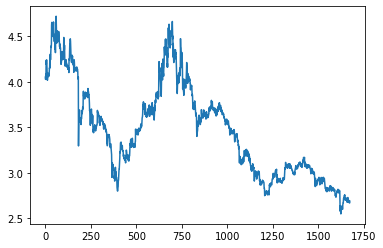

In [10]:
df['close_price']['DSS'].plot()

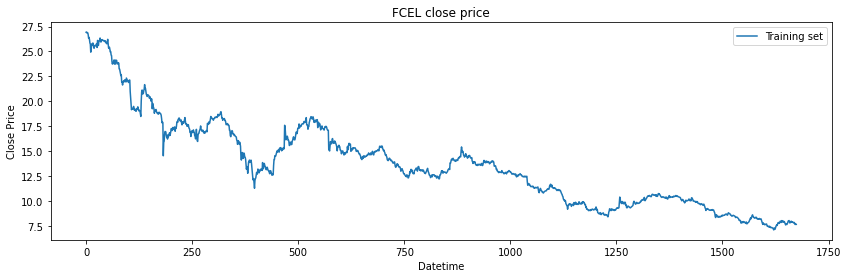

In [18]:
plt.figure(figsize=(14,4))
#plt.plot(training_data['FCEL'])
#plt.plot(test_data['FCEL'])
plt.plot(df['close_price']['FCEL'])
plt.ylabel('Close Price')
plt.xlabel('Datetime')
plt.legend(["Training set", "Test set"])
plt.title("FCEL close price")
plt.show()

In [14]:
df['close_price']['PLUG'].isna().sum()

0